In [1]:
import pandas as pd

# Load the dataset (replace with your actual file path)
df = pd.read_csv('C:/Users/baner/Downloads/creditcard.csv')

# Display the first few rows of the dataset to understand its structure
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Class
0    284315
1       492
Name: count, dtype: int64


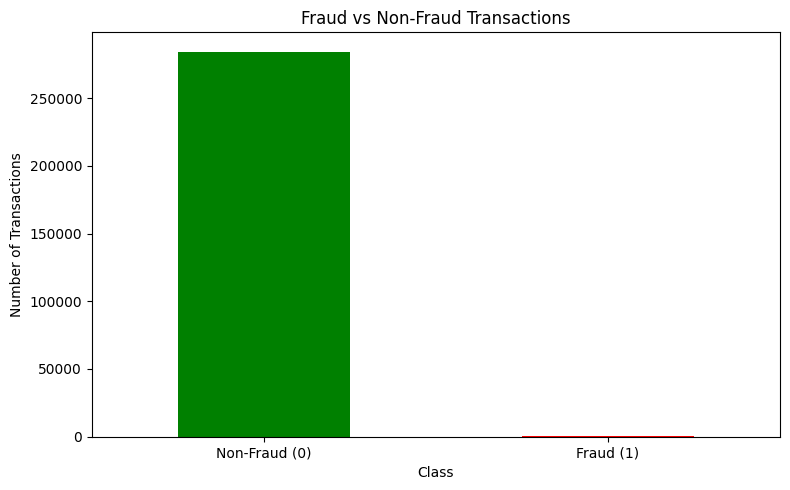

In [2]:
# Check the distribution of the target variable 'Class' (Fraud vs Non-fraud)
fraud_count = df['Class'].value_counts()
print(fraud_count)

# Visualize the distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
fraud_count.plot(kind='bar', color=['green', 'red'])
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'], rotation=0)
plt.tight_layout()
plt.show()


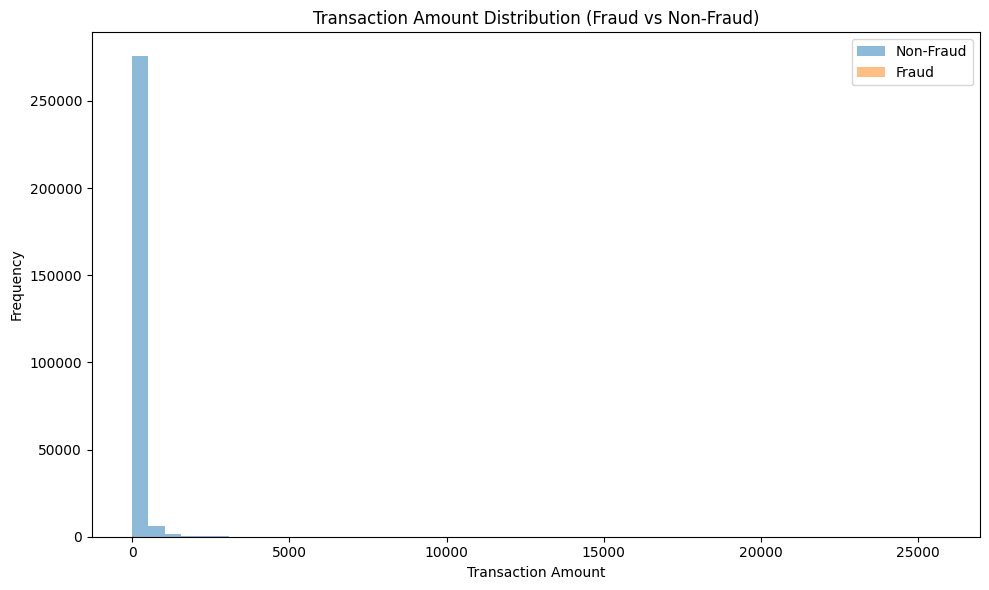

In [3]:
# Visualizing the distribution of Amount (both fraud and non-fraud)
plt.figure(figsize=(10, 6))
df[df['Class'] == 0]['Amount'].plot(kind='hist', alpha=0.5, label='Non-Fraud', bins=50)
df[df['Class'] == 1]['Amount'].plot(kind='hist', alpha=0.5, label='Fraud', bins=50)
plt.title('Transaction Amount Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Transaction Amount')
plt.legend()
plt.tight_layout()
plt.show()


In [4]:
#pip install scikit-learn

In [5]:
#pip install statsmodel

In [6]:
from scipy.stats import chi2_contingency

# Example: Chi-Square test for fraud vs non-fraud based on a random categorical feature (if available)
# Let's create a contingency table for this demonstration
contingency_table = pd.crosstab(df['Class'], df['V1'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")


Chi-Square Statistic: 284806.9999999999
P-Value: 1.9011991537591824e-34


In [7]:
# Calculate correlation between the features and the target variable 'Class'
correlation_matrix = df.corr()

# Get correlation of all variables with the 'Class' variable
correlation_with_class = correlation_matrix['Class'].sort_values(ascending=False)

print(correlation_with_class)


Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


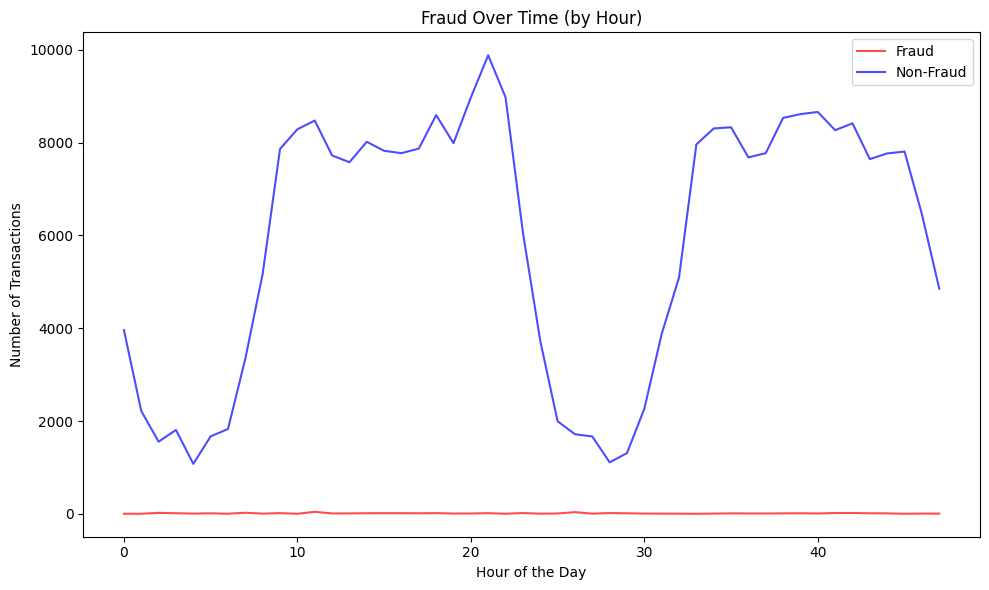

In [8]:
# Fraud over time: Visualize fraudulent transactions over time (let's assume Time is in seconds)
df['Hour'] = (df['Time'] // 3600)  # Convert time to hours for better visualization

# Plot fraud cases over hours
plt.figure(figsize=(10, 6))
fraud_time = df[df['Class'] == 1].groupby('Hour').size()
non_fraud_time = df[df['Class'] == 0].groupby('Hour').size()

plt.plot(fraud_time.index, fraud_time.values, label='Fraud', color='red', alpha=0.7)
plt.plot(non_fraud_time.index, non_fraud_time.values, label='Non-Fraud', color='blue', alpha=0.7)
plt.title('Fraud Over Time (by Hour)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.legend()
plt.tight_layout()
plt.show()


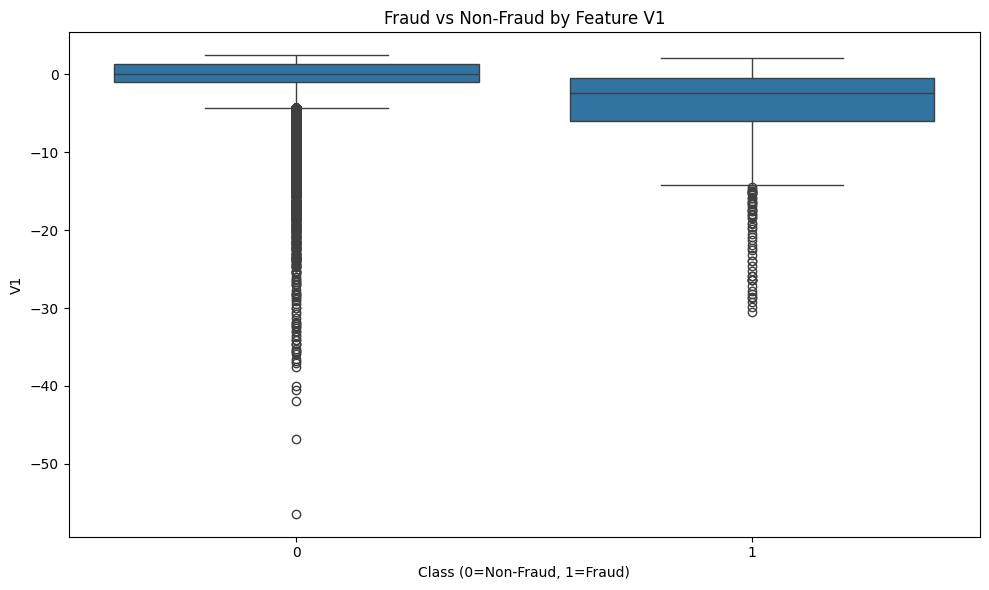

In [9]:
import seaborn as sns
# For simplicity, let's use V1 (one of the anonymized features) to visualize the fraud detection.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Class', y='V1')
plt.title('Fraud vs Non-Fraud by Feature V1')
plt.xlabel('Class (0=Non-Fraud, 1=Fraud)')
plt.ylabel('V1')
plt.tight_layout()
plt.show()



In [10]:
from sklearn.ensemble import IsolationForest

# Use features for anomaly detection (e.g., V1-V28 and Amount)
features = df.drop(columns=['Class', 'Time'])
model = IsolationForest(contamination=0.01)  # Assume 1% of transactions are fraudulent

# Fit the model and predict anomalies
df['anomaly'] = model.fit_predict(features)

# Anomalies will be labeled as -1 (fraudulent) and 1 (non-fraudulent)
fraud_anomalies = df[df['anomaly'] == -1]
print(fraud_anomalies.head())


      Time        V1         V2        V3        V4        V5        V6  \
164  103.0 -6.093248 -12.114213 -5.694973  3.294389 -1.413792  4.776000   
174  112.0 -4.816022  -3.345061  0.566006  3.960568 -2.495400  3.691365   
362  266.0 -2.564961   2.470985  2.649417 -1.564256  1.794297 -0.614742   
401  290.0 -5.166299  -5.449369  2.988498  2.658991  1.948152 -0.854470   
455  333.0 -2.977214   0.781748  2.881724 -1.627798 -1.368067  1.656876   

           V7        V8        V9  ...       V23       V24       V25  \
164  4.808426 -0.228197 -0.525896  ... -3.553381  1.215279 -0.406073   
174  1.603360 -0.071801  1.092418  ... -2.712276 -1.020436  0.070990   
362  4.185906 -3.855359  5.436633  ... -0.532466  0.306494  0.226844   
401 -0.326394 -1.017364  1.983901  ...  3.150413  0.574081  1.018394   
455 -1.185053 -5.393736  1.719407  ...  0.190843  0.533134  0.296773   

          V26       V27       V28   Amount  Class  Hour  anomaly  
164 -0.653384 -0.711222  0.672900  3828.04      0

In [11]:
#pip install seaborn

In [12]:
#pip install matplotlib